In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

# csv sources from bitstamp (1/1/2012-4/22/2020) and coinbase (12/1/2014-1/9/2019)
input_file1 = 'bitstampUSD.csv'
input_file2 = 'coinbaseUSD.csv'

bitstamp = pd.read_csv(input_file1)

# filtering dataframe to include values after January 1st, 2012
parsed_bitstamp = bitstamp.loc[bitstamp['Timestamp'] >= 1325391360]

btotalLength = (len(parsed_bitstamp))

# generated x-axis values to plot later
parsed_bitstamp['x_values'] = [x for x in range(btotalLength)]

# removing rows with NaN values and resetting index
parsed_bitstamp.dropna(axis=0,inplace=True)
parsed_bitstamp.reset_index(inplace=True)

# epoch time to UTC conversion
parsed_bitstamp['UTC_time'] = parsed_bitstamp.Timestamp.apply(lambda x: datetime.datetime.utcfromtimestamp(x)\
                                                              .strftime('%Y-%m-%d %H:%M:%S'))

# dropping old index column
parsed_bitstamp.drop(columns=['index'], inplace=True)

C:\Users\Patri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Patri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Patri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [2]:
bitstamp.shape

(4363457, 8)

In [3]:
# finding % of removed data

bpartialLength = (len(parsed_bitstamp))

bValuesDropped = btotalLength - bpartialLength
bitstampDiff = (btotalLength - bpartialLength) / btotalLength * 100 

# Data lost due to NaN values
print(f"Percentage of total Bitstamp data lost due to dropping rows with NaN values: {bitstampDiff:.2f}%")
print(f"Ratio of Bitstamp rows dropped: {bValuesDropped:,}/{btotalLength:,}")

Percentage of total Bitstamp data lost due to dropping rows with NaN values: 28.33%
Ratio of Bitstamp rows dropped: 1,235,757/4,362,233


In [4]:
parsed_bitstamp.head() # First 5 rows of dataframe

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,x_values,UTC_time
0,1325391360,4.58,4.58,4.58,4.58,1.502000,6.87916,4.58,0,2012-01-01 04:16:00
1,1325431680,4.84,4.84,4.84,4.84,10.000000,48.40000,4.84,672,2012-01-01 15:28:00
2,1325457900,5.00,5.00,5.00,5.00,10.100000,50.50000,5.00,1109,2012-01-01 22:45:00
3,1325534640,5.00,5.00,5.00,5.00,19.048000,95.24000,5.00,2388,2012-01-02 20:04:00
4,1325591100,5.32,5.32,5.32,5.32,2.419173,12.87000,5.32,3329,2012-01-03 11:45:00


In [5]:
parsed_bitstamp.dtypes # all datatypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
x_values               int64
UTC_time              object
dtype: object

In [6]:
parsed_bitstamp.shape

(3126476, 10)

In [7]:
# removing dataframe view limitations
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# finding descriptive statistics
# parsed_bitstamp.describe()



In [8]:
parsed_bitstamp['UTC_time'].nunique()

3126476

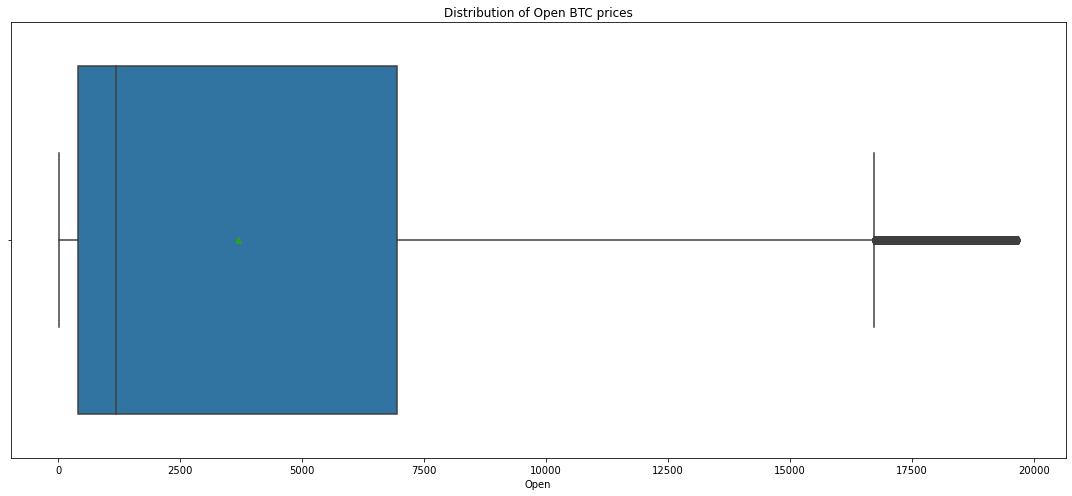

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(parsed_bitstamp['Open'], showmeans=True)
ax.set_title('Distribution of Open BTC prices')

fig.tight_layout()
plt.show()


#bitstamp_mean = parsed_bitstamp['Weighted_Price'].mean()
#bitstamp_median = parsed_bitstamp['Weighted_Price'].median()
#print(bitstamp_mean, bitstamp_median)

#bitstamp_utime = (parsed_bitstamp['x_values'].values + 1)
#bitstamp_price = parsed_bitstamp.Weighted_Price.values
#print(bitstamp_utime)

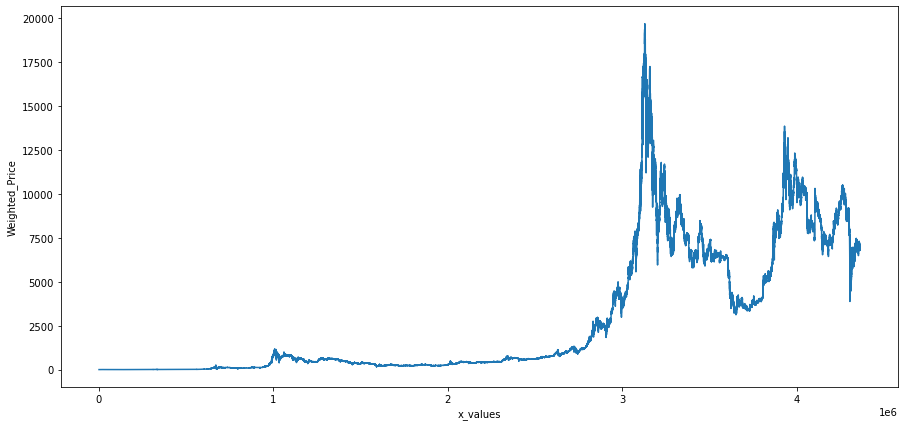

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x=parsed_bitstamp['x_values'], y=parsed_bitstamp['Weighted_Price'])
plt.show()

In [11]:
# coinbase = pd.read_csv('coinbaseUSD.csv')
# ctotalLength = (len(coinbase))
# coinbase.dropna(axis=0,inplace=True)
# cpartialLength = (len(coinbase))
# coinbaseDiff = (ctotalLength - cpartialLength) / ctotalLength * 100 # % of removed data
# print(coinbaseDiff)

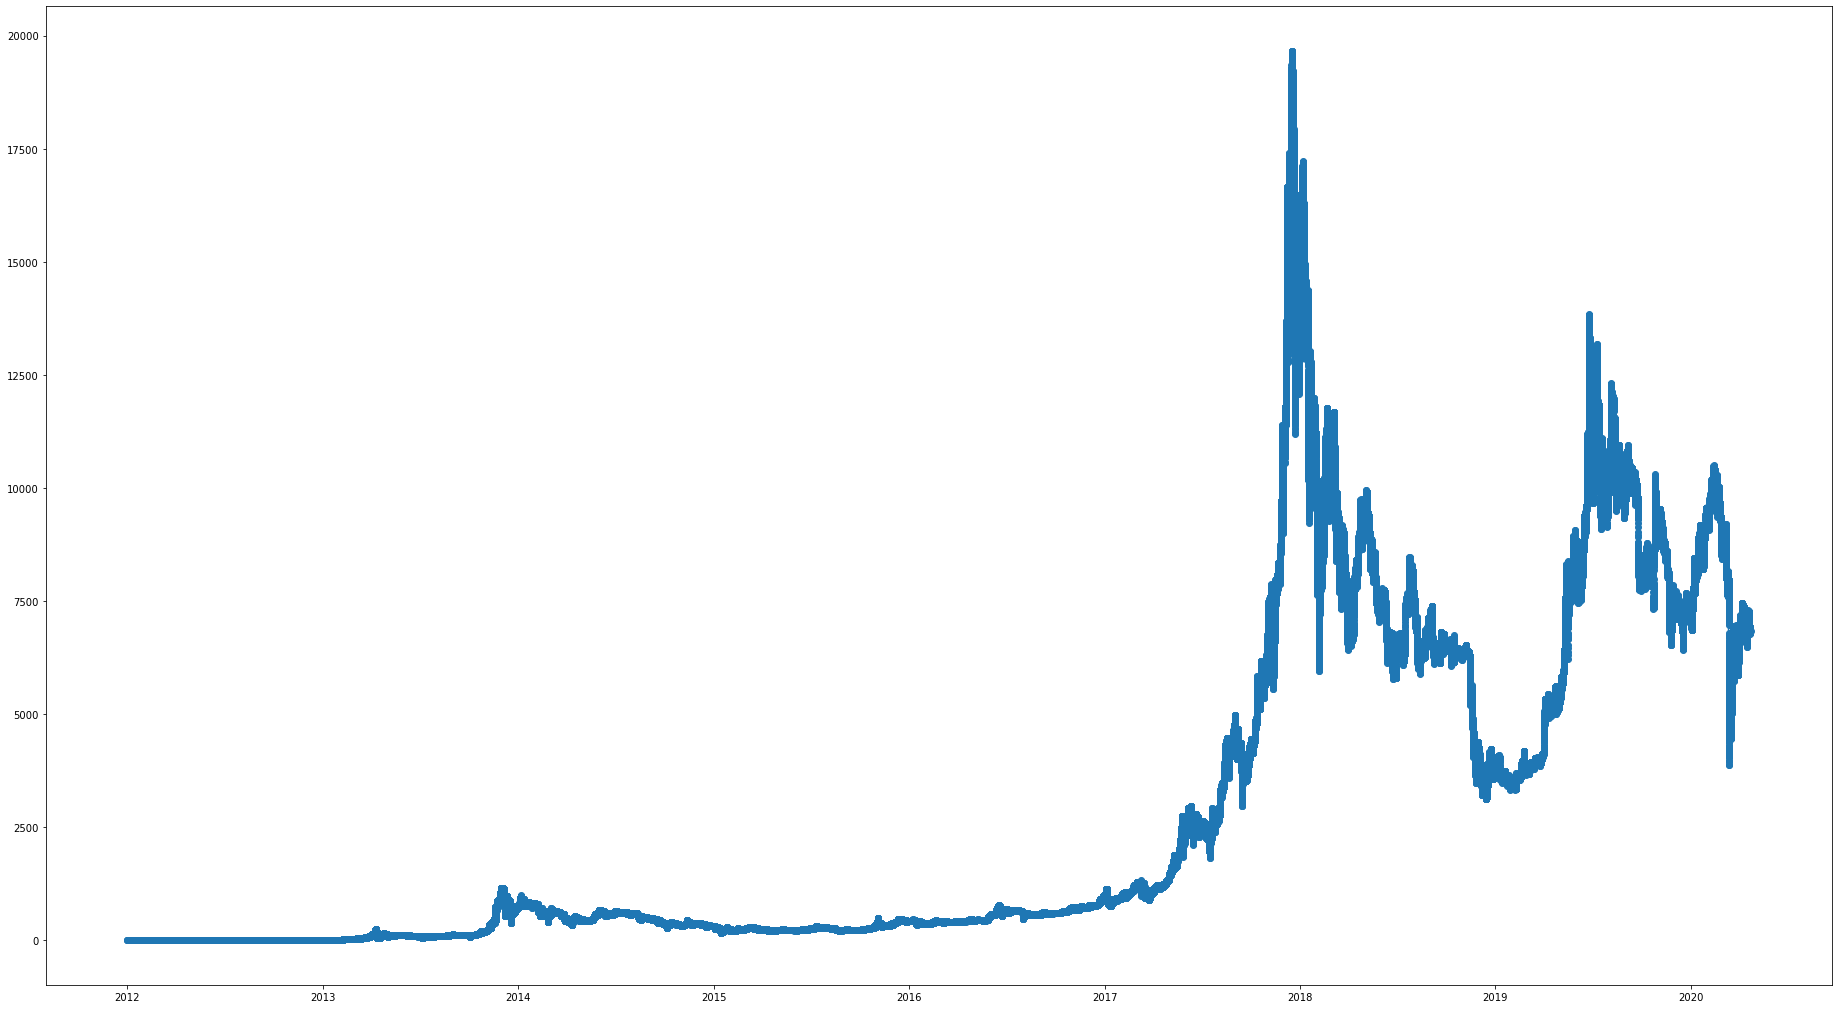

In [12]:
fig, ax = plt.subplots(figsize=(32,18))

dates = []
temp_dates = parsed_bitstamp['UTC_time'].values
for date in temp_dates:
    dates.append(date.split()[0])
    

times = [datetime.datetime.strptime(str(i), '%Y-%m-%d') for i in dates]

'''
print(type(parsed_bitstamp['UTC_time'][1]))
for val in parsed_bitstamp['UTC_time'].values:
    print(val.split()[0])
    break
'''

ax.plot_date(x=times, y=parsed_bitstamp['Weighted_Price'], fmt='o-')

plt.savefig('BTC_bitstamp_trend.png', bbox_inches='tight', dpi=100)

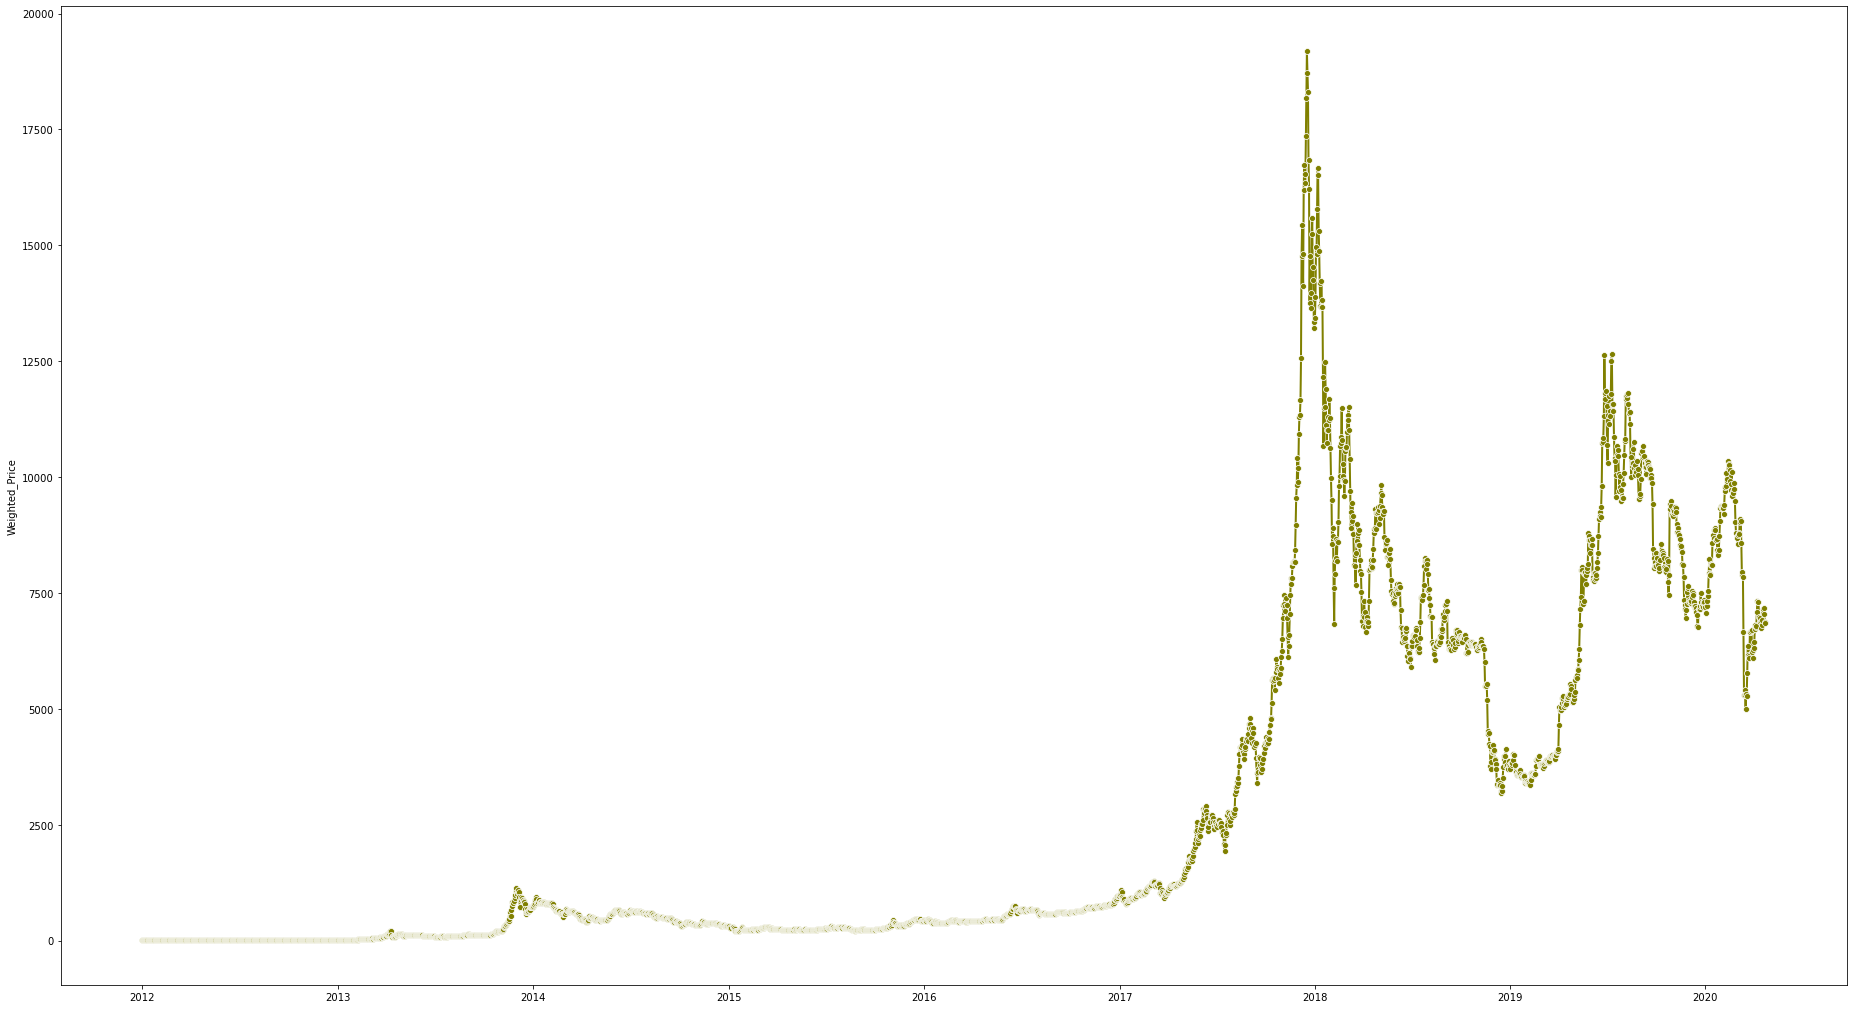

In [13]:
fig, ax = plt.subplots(figsize=(32,18))
ax = sns.lineplot(x=times, y=parsed_bitstamp['Weighted_Price'], marker='o', color='olive', linewidth=2, linestyle='dashed')

plt.show()

In [14]:
figure = plt.gcf()  # get current figure
#figure.set_size_inches(32, 18) # set figure's size manually to your full screen (32x18)
plt.savefig('BTC_bitstamp_trend.png', bbox_inches='tight', dpi=400) # bbox_inches removes extra white spaces

<Figure size 432x288 with 0 Axes>

In [15]:
parsed_bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,x_values,UTC_time
0,1325391360,4.580,4.580,4.580,4.580,1.502,6.879,4.580,0,2012-01-01 04:16:00
1,1325431680,4.840,4.840,4.840,4.840,10.000,48.400,4.840,672,2012-01-01 15:28:00
2,1325457900,5.000,5.000,5.000,5.000,10.100,50.500,5.000,1109,2012-01-01 22:45:00
3,1325534640,5.000,5.000,5.000,5.000,19.048,95.240,5.000,2388,2012-01-02 20:04:00
4,1325591100,5.320,5.320,5.320,5.320,2.419,12.870,5.320,3329,2012-01-03 11:45:00


In [16]:
#parsed_bitstamp['UTC_time'] = [parsed_bitstamp['UTC_time'][i][0:10] for i in range(len(parsed_bitstamp))]

In [20]:
short_date = [parsed_bitstamp['UTC_time'][i][0:10] for i in range(len(parsed_bitstamp))]

In [74]:
month_days = [parsed_bitstamp['UTC_time'][i][5:10] for i in range(len(parsed_bitstamp))]

In [18]:
parsed_bitstamp['UTC_time'].tail()

3126471    2020-04-21 23:56:00
3126472    2020-04-21 23:57:00
3126473    2020-04-21 23:58:00
3126474    2020-04-21 23:59:00
3126475    2020-04-22 00:00:00
Name: UTC_time, dtype: object

In [19]:
range(len(parsed_bitstamp))

range(0, 3126476)

In [22]:
print(type(short_date))

<class 'list'>


In [24]:
len(short_date)

3126476

In [75]:
years = [datetime.datetime.strptime(str(i), '%Y') for i in months_only]
#month_day = [datetime.datetime.strptime(str(i), '%m-%d') for i in month_days]

ValueError: day is out of range for month

In [77]:
parsed_bitstamp['short_date'] = date
parsed_bitstamp['month_days'] = month_days

C:\Users\Patri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Patri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
#parsed_bitstamp.drop(columns='year',inplace=True)

In [81]:
parsed_bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,x_values,UTC_time,short_date,month_days
0,1325391360,4.580,4.580,4.580,4.580,1.502,6.879,4.580,0,2012-01-01 04:16:00,2012-01-01,01-01
1,1325431680,4.840,4.840,4.840,4.840,10.000,48.400,4.840,672,2012-01-01 15:28:00,2012-01-01,01-01
2,1325457900,5.000,5.000,5.000,5.000,10.100,50.500,5.000,1109,2012-01-01 22:45:00,2012-01-01,01-01
3,1325534640,5.000,5.000,5.000,5.000,19.048,95.240,5.000,2388,2012-01-02 20:04:00,2012-01-02,01-02
4,1325591100,5.320,5.320,5.320,5.320,2.419,12.870,5.320,3329,2012-01-03 11:45:00,2012-01-03,01-03


In [82]:
#parsed_bitstamp.drop(columns='month',inplace=True)

In [83]:
# filtering BTC data by year to display on multiple-line graph
BTC2012 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2012-01-01') & (parsed_bitstamp['short_date'] <= '2012-12-31')]
BTC2013 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2013-01-01') & (parsed_bitstamp['short_date'] <= '2013-12-31')]
BTC2014 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2014-01-01') & (parsed_bitstamp['short_date'] <= '2014-12-31')]
BTC2015 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2015-01-01') & (parsed_bitstamp['short_date'] <= '2015-12-31')]
BTC2016 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2016-01-01') & (parsed_bitstamp['short_date'] <= '2016-12-31')]
BTC2017 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2017-01-01') & (parsed_bitstamp['short_date'] <= '2017-12-31')]
BTC2018 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2018-01-01') & (parsed_bitstamp['short_date'] <= '2018-12-31')]
BTC2019 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2019-01-01') & (parsed_bitstamp['short_date'] <= '2019-12-31')]
BTC2020 = parsed_bitstamp[(parsed_bitstamp['short_date'] >= '2020-01-01') & (parsed_bitstamp['short_date'] <= '2020-12-31')]

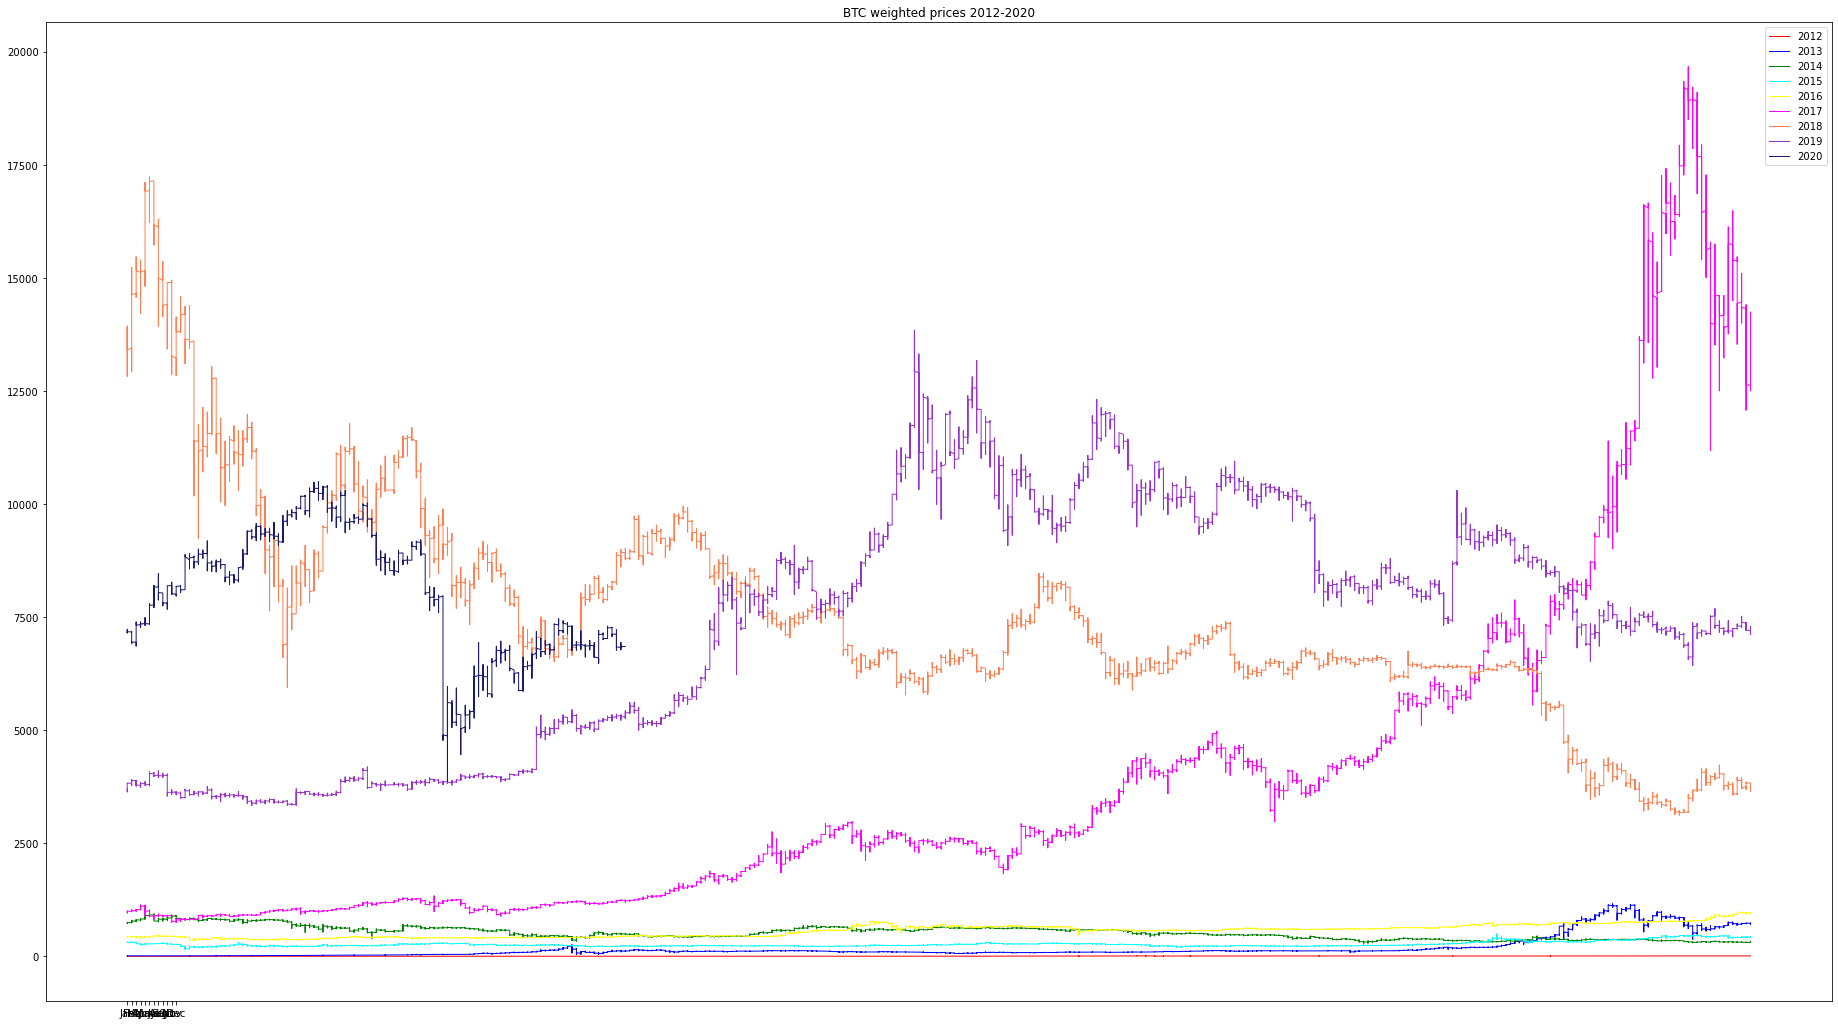

In [92]:
fig2, ax2 = plt.subplots(figsize=(32,18))

ax2.plot(BTC2012['month_days'], BTC2012['Weighted_Price'], color='red', linewidth=1, label='2012')
ax2.plot(BTC2013['month_days'], BTC2013['Weighted_Price'], color='blue', linewidth=1, label='2013')
ax2.plot(BTC2014['month_days'], BTC2014['Weighted_Price'], color='green', linewidth=1, label='2014')
ax2.plot(BTC2015['month_days'], BTC2015['Weighted_Price'], color='cyan', linewidth=1, label='2015')
ax2.plot(BTC2016['month_days'], BTC2016['Weighted_Price'], color='yellow', linewidth=1, label='2016')
ax2.plot(BTC2017['month_days'], BTC2017['Weighted_Price'], color='magenta', linewidth=1, label='2017')
ax2.plot(BTC2018['month_days'], BTC2018['Weighted_Price'], color='Coral', linewidth=1, label='2018')
ax2.plot(BTC2019['month_days'], BTC2019['Weighted_Price'], color='DarkOrchid', linewidth=1, label='2019')
ax2.plot(BTC2020['month_days'], BTC2020['Weighted_Price'], color='MidnightBlue', linewidth=1, label='2020')
ax2.legend(loc=0)
ax2.set_title('BTC weighted prices 2012-2020')
ax2.set_xticks(range(12))
ax2.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.savefig('BTC_bitstamp_trend_by_year.png', bbox_inches='tight', dpi=400) # bbox_inches removes extra white spaces